# Data Cleaning

Data Cleaning Needed:
- Salary Parsing
- Company name text only
- State field
- Age of company
- Job description parsing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Data/salary_data_unclean_ca.csv')

In [3]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Senior Data Scientist // Scientifique des donn...,CA$58k-CA$90k (Glassdoor Est.),"Reporting to the Analytics Manager, the Senior...",4.1,SSENSE\n4.1,Montreal,-1,501 to 1000 Employees,2003,Company - Private,"Department, Clothing, & Shoe Stores",Retail,Unknown / Non-Applicable,-1
1,"Data Scientist, Game",CA$58k-CA$90k (Glassdoor Est.),"Prodigy Education connects students, parents, ...",4.4,Prodigy Education\n4.4,Toronto,-1,201 to 500 Employees,2011,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
2,"Product Manager, Data Science",CA$58k-CA$90k (Glassdoor Est.),Numerator is a data and technology company rei...,4.1,Numerator\n4.1,Ottawa,-1,1001 to 5000 Employees,2004,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1
3,Data Mining Specialist,CA$58k-CA$90k (Glassdoor Est.),"What we do\nInterested in solving problems, en...",5.0,Global Spatial Technology Solutions\n5.0,Dartmouth,-1,1 to 50 Employees,-1,Unknown,-1,-1,Less than $1 million (USD),-1
4,"Data Analyst, NAV Recon",CA$58k-CA$90k (Glassdoor Est.),"Data Analyst, NAV Recon\nConnor, Clark & Lunn ...",4.3,"Connor, Clark & Lunn Financial Group\n4.3",Vancouver,-1,201 to 500 Employees,1982,Company - Private,Investment Banking & Asset Management,Finance,$25 to $50 million (USD),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Principal Data Engineer,-1,Job Title:\nPrincipal Data Engineer\nRequisiti...,3.3,Activision Blizzard\n3.3,Vancouver,-1,10000+ Employees,1979,Company - Public,Video Games,Media,$5 to $10 billion (USD),-1
996,Sr. Data Analyst/Reporting Specialist,-1,Title: Sr. Data Analyst/Reporting Specialist\n...,4.7,TEEMA\n4.7,Edmonton,-1,201 to 500 Employees,2008,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),-1
997,Data Engineer - 14406,-1,IT/IQ Tech Recruiters is seeking a Data Engine...,3.1,IT IQ TECH RECRUITERS LTD\n3.1,Vancouver,-1,1 to 50 Employees,2002,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1
998,Big Data Engineer,-1,Role and Responsibilities*\nThe candidate will...,-1.0,AstraNorth,Kitchener,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
df.shape

(1000, 14)

### Salary Parsing

In [5]:
df['Salary Estimate']

0      CA$58k-CA$90k (Glassdoor Est.)
1      CA$58k-CA$90k (Glassdoor Est.)
2      CA$58k-CA$90k (Glassdoor Est.)
3      CA$58k-CA$90k (Glassdoor Est.)
4      CA$58k-CA$90k (Glassdoor Est.)
                    ...              
995                                -1
996                                -1
997                                -1
998                                -1
999                                -1
Name: Salary Estimate, Length: 1000, dtype: object

In [6]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [7]:
salary

0      CA$58k-CA$90k 
1      CA$58k-CA$90k 
2      CA$58k-CA$90k 
3      CA$58k-CA$90k 
4      CA$58k-CA$90k 
            ...      
995                -1
996                -1
997                -1
998                -1
999                -1
Name: Salary Estimate, Length: 1000, dtype: object

In [8]:
minus_Kd = salary.apply(lambda x: x.replace('k','').replace('$','').replace('CA',''))

In [9]:
minus_Kd

0      58-90 
1      58-90 
2      58-90 
3      58-90 
4      58-90 
        ...  
995        -1
996        -1
997        -1
998        -1
999        -1
Name: Salary Estimate, Length: 1000, dtype: object

In [10]:
df['Hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['EmployerProvided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)

In [11]:
min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary',''))

In [12]:
df['MinSalary'] = min_hr.apply(lambda x: x.split('-')[0])
df['MinSalary'] = pd.to_numeric(df['MinSalary'], errors='coerce')

df['MinSalary'].dtype

dtype('float64')

In [13]:
df['MaxSalary'] = min_hr.apply(lambda x: x.split('-')[1])
df['MaxSalary'] = pd.to_numeric(df['MaxSalary'], errors='coerce')

df['MaxSalary'].dtype

dtype('int64')

In [14]:
df['MinSalary']

0      58.0
1      58.0
2      58.0
3      58.0
4      58.0
       ... 
995     NaN
996     NaN
997     NaN
998     NaN
999     NaN
Name: MinSalary, Length: 1000, dtype: float64

In [15]:
df['MaxSalary']

0      90
1      90
2      90
3      90
4      90
       ..
995     1
996     1
997     1
998     1
999     1
Name: MaxSalary, Length: 1000, dtype: int64

In [16]:
df['AvgSalary'] = (df['MinSalary'] + df['MaxSalary'])/2

In [17]:
df.AvgSalary.unique()

array([74. , 64. , 86.5, 59. , 80.5, 88.5,  nan, 96. , 57.5, 56. , 88. ,
       70.5, 70. , 65. , 76.5, 51.5, 74.5, 49. , 95.5])

In [18]:
print('Average Salary is: $', df['AvgSalary'].mean(),'k')

Average Salary is: $ 72.57894736842105 k


In [19]:
df[['MinSalary', 'MaxSalary']]

,MinSalary,MaxSalary
0,58.0,90
1,58.0,90
2,58.0,90
3,58.0,90
4,58.0,90
...,...,...
995,NaN,1
996,NaN,1
997,NaN,1
998,NaN,1


### Cleaning Company Name

In [20]:
df['CompanyText'] = df['Company Name'].apply(lambda x: x.split("\n")[0])


### Cleaning Company Location

In [21]:
df['Location'].value_counts()

Toronto            313
Vancouver          156
Montreal           143
Mississauga         63
Ottawa              39
Canada              28
Edmonton            21
Calgary             21
Burnaby             18
Brampton            16
Oakville            13
Markham             12
Quebec              11
Kitchener            9
Ontario              8
Victoria             7
Waterloo             7
Saint-Laurent        7
Winnipeg             6
North York           6
Laval                6
Moncton              5
Greenfield           5
Halifax              5
London               4
Newmarket            4
Hamilton             4
Kirkland             4
Regina               4
North Vancouver      4
Kingston             3
Saskatoon            3
Surrey               3
Cochin               3
Guelph               3
Richmond             3
Fredericton          3
Richmond Hill        2
Scarborough          2
Cambridge            2
Senneville           2
Remote               2
St. John's           2
Dorval     

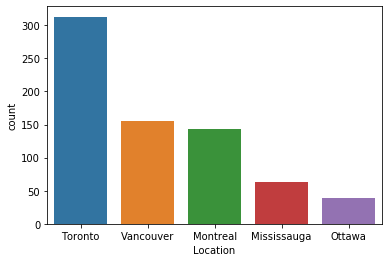

In [22]:
sns.countplot(x='Location', data=df, order=pd.value_counts(df['Location']).iloc[:5].index)

In [23]:
df['Province'] = df['Location'].apply(lambda x: 'Ontario' if 'toronto' in x.lower() 
else ('British Columbia' if 'vancouver' in x.lower()
else ('Quebec' if 'montreal' in x.lower()
else ('Ontario' if 'mississauga' in x.lower()
else ('Ontario' if 'ottawa' in x.lower()
else ('Unknown' if 'canada' in x.lower()
else ('Alberta' if 'edmonton' in x.lower()
else ('Alberta' if 'calgary' in x.lower()
else ('British Columbia' if 'burnaby' in x.lower()
else ('Ontario' if 'brampton' in x.lower()
else ('Ontario' if 'oakville' in x.lower()
else ('Ontario' if 'markham' in x.lower()
else ('Quebec' if 'quebec' in x.lower()
else ('Ontario' if 'kitchener' in x.lower()
else ('Ontario' if 'ontario' in x.lower()
else ('Ontario' if 'waterloo' in x.lower()
else ('British Columbia' if 'victoria' in x.lower()
else ('Quebec' if 'saint-laurent' in x.lower()
else ('Quebec' if 'laval' in x.lower()
else ('Manitoba' if 'winnipeg' in x.lower()
else ('Ontario' if 'north york' in x.lower()
else ('Nova Scotia' if 'halifax' in x.lower()
else ('Ontario' if 'greenfield' in x.lower()
else ('New Brunswick' if 'moncton' in x.lower()
else ('Ontario' if 'kirkland lake' in x.lower()
else ('Ontario' if 'london' in x.lower()
else ('British Columbia' if 'north vancouver' in x.lower()
else ('Saskatchewan' if 'regina' in x.lower()
else ('Ontario' if 'newmarket' in x.lower()
else ('Ontario' if 'hamilton' in x.lower()
else ('Saskatchewan' if 'saskatoon' in x.lower()
else ('Saskatchewan' if 'kochi' in x.lower()
else ('New Brunswick' if 'fredericton' in x.lower()
else ('Ontario' if 'kingston' in x.lower()
else ('British Columbia' if 'richmond' in x.lower()
else ('British Columbia' if 'surrey' in x.lower()
else ('Ontario' if 'guelph' in x.lower()
else ('Ontario' if 'cambridge' in x.lower()
else ('Ontario' if 'scarborough' in x.lower()
else ('Quebec' if 'dorval' in x.lower()
else ('Unknown' if 'remote' in x.lower()
else ('Quebec' if 'montréal-est' in x.lower()
else ('Quebec' if 'senneville' in x.lower()
else ('Newfoundland and Labrador' if "st. john's" in x.lower()
else ('Ontario' if 'richmond hill' in x.lower()
else ('Ontario' if 'kanata' in x.lower()
else ('British Columbia' if 'kelowna' in x.lower()
else ('Quebec' if 'bromont' in x.lower()
else ('Ontario' if 'collingwood' in x.lower()
else ('British Columbia' if 'saanichton' in x.lower()
else ('Ontario' if 'chatham-kent' in x.lower()
else ('Nova Scotia' if 'dartmouth' in x.lower()
else ('Ontario' if 'burlington' in x.lower()
else ('Alberta' if 'medicine hat' in x.lower()
else ('Ontario' if 'concord' in x.lower()
else ('Quebec' if 'rivière-du-Loup' in x.lower()
else ('Saskatchewan' if 'welwyn' in x.lower()
else ('Nova Scotia' if 'east bay, nova scotia' in x.lower()
else ('Ontario' if 'st. jacobs' in x.lower()
else ('Saskatchewan' if 'cochin' in x.lower()
else ('Quebec' if 'kirkland' in x.lower()
else ('Ontario' if 'chatham' in x.lower()
else ('Nova Scotia' if 'east bay' in x.lower()
else ('Quebec' if "rivière-du-loup" in x.lower()
    else 0))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))

In [24]:
df['Province'].value_counts()

Ontario                      519
British Columbia             195
Quebec                       179
Alberta                       43
Unknown                       30
Saskatchewan                  11
New Brunswick                  8
Nova Scotia                    7
Manitoba                       6
Newfoundland and Labrador      2
Name: Province, dtype: int64

[Text(0, 0, 'Ontario'),
 Text(0, 0, 'British Columbia'),
 Text(0, 0, 'Quebec'),
 Text(0, 0, 'Alberta'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Saskatchewan'),
 Text(0, 0, 'New Brunswick'),
 Text(0, 0, 'Nova Scotia'),
 Text(0, 0, 'Manitoba'),
 Text(0, 0, 'Newfoundland and Labrador')]

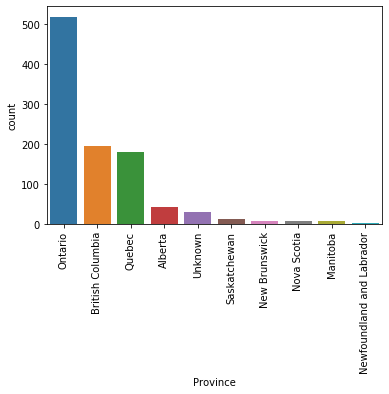

In [25]:
prov_chart = sns.countplot(x='Province', data=df, order = df['Province'].value_counts().index)
prov_chart.set_xticklabels(prov_chart.get_xticklabels(), rotation=90)

### Age of Company

In [26]:
df['Age'] = df.Founded.apply(lambda x: x if x <1 else 2020-x)

In [27]:
df['Age'] 

0       17
1        9
2       16
3       -1
4       38
      ... 
995     41
996     12
997     18
998     -1
999    181
Name: Age, Length: 1000, dtype: int64

In [28]:
print('Average Age of Companies:',df['Age'].mean())

Average Age of Companies: 33.318


### Parse out Keywords

Common Keywords to parse:
- Python
- R Studio
- Spark
- AWS
- Excel    

In [29]:
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df.Python.value_counts()

1    618
0    382
Name: Python, dtype: int64

In [30]:
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.Spark.value_counts()

0    685
1    315
Name: Spark, dtype: int64

In [31]:
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.AWS.value_counts()

0    741
1    259
Name: AWS, dtype: int64

In [32]:
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.Excel.value_counts()

0    512
1    488
Name: Excel, dtype: int64

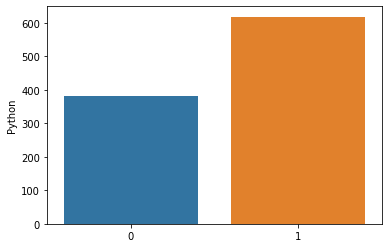

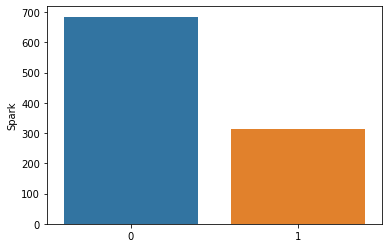

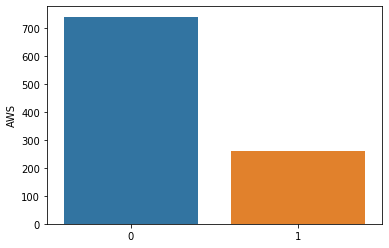

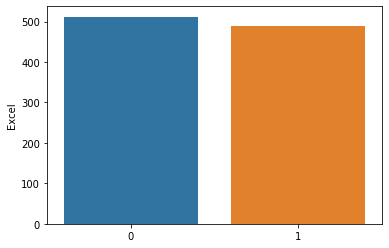

In [33]:
df_keywords = df[['Python', 'Spark', 'AWS', 'Excel']]

for i in df_keywords.columns:
    key_num = df_keywords[i].value_counts()
    sns.barplot(x=key_num.index, y=key_num)
    plt.show()

### Simplify Title and Seniority

In [34]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'MLE'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority (title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'associate' in title.lower():
        return 'jr'
    else:
        return 'na'

In [35]:
df['JobSimplified'] = df['Job Title'].apply(title_simplifier)

In [36]:
df['JobSimplified'].value_counts()

data engineer     274
analyst           238
na                233
data scientist    147
MLE                71
manager            33
director            4
Name: JobSimplified, dtype: int64

In [37]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [38]:
df['Seniority'].value_counts()

na        653
senior    331
jr         16
Name: Seniority, dtype: int64

In [39]:
df['DescLength'] = df['Job Description'].apply(lambda x: len(x))
df['DescLength']

0      5605
1      5629
2      4674
3      3632
4      6532
       ... 
995    5835
996    2984
997    3010
998    1662
999    2781
Name: DescLength, Length: 1000, dtype: int64

In [40]:
# Split data if dataframe shows competitors

#df['Num Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

### Hourly Wage to Annual

In [41]:
# For data if it is in hourly

df['MinSalary'] = df.apply(lambda x: x.MinSalary*2 if x.Hourly==1 else x.MinSalary, axis=1)
df['MaxSalary'] = df.apply(lambda x: x.MaxSalary*2 if x.Hourly==1 else x.MaxSalary, axis=1)

In [42]:
df[['MinSalary','MaxSalary']]

,MinSalary,MaxSalary
0,58.0,90
1,58.0,90
2,58.0,90
3,58.0,90
4,58.0,90
...,...,...
995,NaN,1
996,NaN,1
997,NaN,1
998,NaN,1


### Output to CSV

In [43]:
df.to_csv('Data/salary_data_clean_ca.csv', index=False)